# Forelesning 4: Numerisk derivasjon

https://www.menti.com/oos4kx9c72

## Definisjon

Analytisk derivasjon:
$$f'(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Numerisk derivasjon:
$$f'(x) \approx \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

der $\Delta x$ er et lite tall.

## Derivasjon av funksjoner

In [1]:
def f(x):
    return x**2 + 1

x = 1
dx = 1E-8

dy = f(x + dx) - f(x)
dydx = dy/dx

print(dydx)

1.999999987845058


In [2]:
def f(x):
    return x**2 + 1


def fder(f, x, dx = 1E-8):
    der = (f(x + dx) - f(x))/dx
    return der

print(fder(f,1,1E-10))

2.000000165480742


In [3]:
def f(x):
    return x**3 - 4*x + 3


def framoverdifferanse(f, a, dx = 1E-8):
    """
    Deriverer en funksjon f i punktet a.
    ----------
    f : function
        Funksjonen vi skal derivere.
    a : float
        Punktet vi skal evaluere den deriverte i.
    dx : float, optional
        Endringen i x-verdier. The default is 1E-8.

    Returns
    -------
    der : float.
          Den deriverte av f(a)
    """
    der = (f(x + dx) - f(x))/dx
    return der

print(framoverdifferanse(f,1))

-0.999999993922529


Velger en dx som er så liten som mulig ($dx \rightarrow 0$), men ikke for liten. Da forstørres feilen, og vi får en dårligere tilnærming.

In [5]:
def bakoverdifferanse(f, a, dx = 1E-8):
    der = (f(a) - f(a - dx))/dx
    return der

print(bakoverdifferanse(f,1))

def sentraldifferanse(f, a, dx = 1E-8):
    der = (f(a + dx) - f(a - dx))/(2*dx)
    return der

print(sentraldifferanse(f,1))

-1.00000003833145
-1.0000000161269895


## Derivasjon av data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/andreasdh/programmering-i-kjemi/master/docs/datafiler/heistur_kjemi_fysikk.txt")

In [8]:
tid = data["time_s"]
s = data["height_m"]
v = []

for i in range(len(tid)-1):
    dy = s[i+1] - s[i]
    dt = tid[i+1] - tid[i]
    dydt = dy/dt
    v.append(dydt)
    
v.append(None)

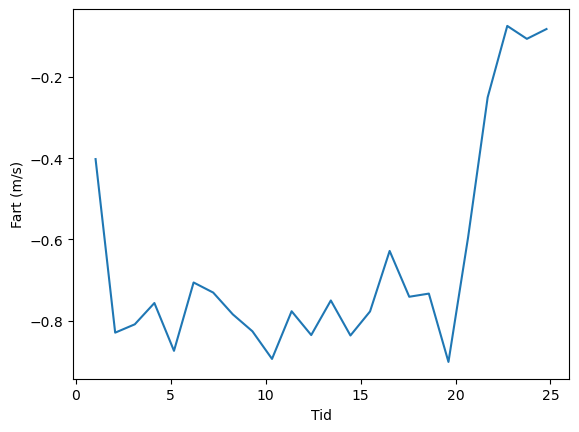

In [11]:
plt.plot(tid, v)
plt.xlabel("Tid")
plt.ylabel("Fart (m/s)")
plt.show()